## Using ANOVA for hypothesis testing

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
#df = pd.DataFrame({'A':[25, 30, 28, 36, 29], 'B': [45, 55,29,56,40], 'c':[30,29, 33,37,27],'D':[54, 60, 51, 62, 73]})
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")

In [3]:
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


### Since we have treatments A, B, C, D in this dataset, we are dealing with one factor that has 4 levels and these treatments are independent. So we can use one-way ANOVA

In [4]:
stats.f_oneway(df['A'], df['B'], df['C'],df['D'])

F_onewayResult(statistic=17.492810457516338, pvalue=2.639241146210922e-05)

### Since p_value = 0.000026 is smaller than alpha = 0.05 -> it is significant and we reject the null hypothesis. P-value is inversely related to F-value, higher f-value indicates a significant p-value

In [6]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

In [7]:
df_melt

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [15]:
df_melt.columns=['index','treatments','values']

In [16]:
#!pip install bioinfokit
from bioinfokit.analys import stat

In [21]:
res = stat()
res.anova_stat(df = df_melt, res_var='values', anova_model='values ~ C(treatments)') #res_var is the responce variable/s in string format
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [23]:
res2 = stat()
res2.tukey_hsd(df=df_melt, res_var='values', xfac_var='treatments', anova_model='values ~ C(treatments)')
#xfac_var: Name of a column having factor or group for pairwise comparison [string][default: None]
res2.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


### Above results from Tukey’s HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences.

<AxesSubplot:xlabel='treatments', ylabel='values'>

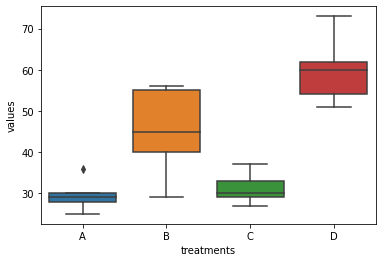

In [9]:
sns.boxplot(x=df_melt['treatments'], y=df_melt['values'], data=df_melt)

- Looking at the boxplots also shows that the mean of these 4 treatment groups are not equal.

In [51]:
data2 = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")

In [53]:
data2

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4
5,6,2,5
6,7,2,2
7,8,2,4
8,9,2,2
9,10,2,3


In [57]:
data2.drop('person', axis=1, inplace=True)

In [58]:
data2

,dose,libido
0,1,3
1,1,2
2,1,1
3,1,1
4,1,4
5,2,5
6,2,2
7,2,4
8,2,2
9,2,3


In [60]:
data2['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

In [61]:
data2

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4
5,low,5
6,low,2
7,low,4
8,low,2
9,low,3


In [66]:
stats.f_oneway(data2[data2['dose'] == 'placebo']['libido'], data2[data2['dose'] == 'low']['libido'], data2[data2['dose'] == 'high']['libido'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

<AxesSubplot:xlabel='dose', ylabel='libido'>

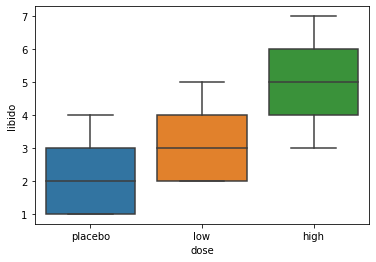

In [67]:
sns.boxplot(x=data2['dose'], y=data2['libido'], data=data2)

In [69]:
model = ols('libido~ C(dose)', data=data2).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,20.133333,10.066667,5.118644,0.024694
Residual,12.0,23.600000,1.966667,NaN,NaN


In [26]:
df2 = pd.read_csv('https://www.reneshbedre.com/assets/posts/anova/twowayanova.txt', sep='\t')

In [27]:
df2

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


In [28]:
df2_melt = pd.melt(df2, id_vars = ['Genotype'], value_vars = ['1_year', '2_year', '3_year'])

In [30]:
df2_melt.columns = ['Genotype', 'years', 'value']

In [31]:
df2_melt

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


<AxesSubplot:xlabel='Genotype', ylabel='value'>

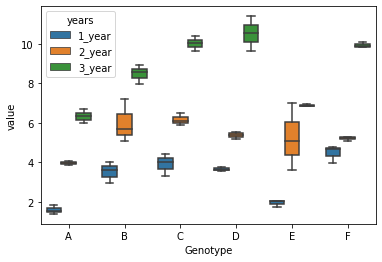

In [32]:
sns.boxplot(x='Genotype', y='value', hue='years', data=df2_melt) 

In [33]:
twoway = stat()
twoway.anova_stat(df=df2_melt, res_var='value', anova_model='value~C(Genotype)+C(years)+C(Genotype):C(years)')
twoway.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Genotype),5.0,58.551733,11.710347,32.748581,1.931655e-12
C(years),2.0,278.925633,139.462817,390.014868,4.006243e-25
C(Genotype):C(years),10.0,17.122967,1.712297,4.788525,2.230094e-04
Residual,36.0,12.873000,0.357583,NaN,NaN
